# testing metrics
this code test different metrics i.e. circularity etc to see if is doing the job it is supposed to.

using 30th july processed to run stats

also a lot of csv methods used

In [29]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from glob import glob
import seaborn as sns
import xesmf as xe
import pandas as pd
#import def_homebrew as hb ## homemade functions xox
from scipy.special import gamma
import netCDF4 as nc
from datetime import datetime, timedelta

import h5py ####
from PIL import Image
#from IPython.display import display #
#import cv2 # not working
import os
import shutil

from scipy.ndimage import convolve, label
from skimage.measure import regionprops, find_contours
from scipy.spatial import ConvexHull, distance_matrix
from skimage.morphology import remove_small_holes ## remove holes <3
from scipy.ndimage import binary_fill_holes
from skimage import measure
from cv2 import cvtColor, COLOR_BGR2GRAY, threshold, THRESH_BINARY, THRESH_OTSU
import random
import tensorflow as tf


In [62]:
#path = '/home/users/esree/processed_images/'
path = '/gws/nopw/j04/dcmex/users/ezriab/processed_images/2ds/ch_0/220730153000/'

#csv = 'merged_stats_habits.csv'
csv = '220730153000_stats_habits.csv'

og_df = pd.read_csv(path+csv)
## again with the new naming scheme in the df, everything is difficult, so are removing it
og_df['name'] = og_df['name'].str.replace('_ch_0', '', regex=False)
# remove truncated ones
df = og_df[(og_df['first_diode_trunc'] == 0) & (og_df['last_diode_trunc'] == 0)]

In [85]:
trunc_df = og_df[(og_df['first_diode_trunc'] != 0) & (og_df['last_diode_trunc'] != 0)] # both trunc
df_or = og_df[(og_df['first_diode_trunc'] != 0) | (og_df['last_diode_trunc'] != 0)]

trunc_list = list(trunc_df['name'])

new_image_path = '/gws/nopw/j04/dcmex/users/ezriab/processed_images/2ds/ch_0/220730153000/'
save_path = '/home/users/esree/image-examples/v2/trunc/'

for name in trunc_list:
    try:
        og_file = f'{new_image_path}{name}.png'
        if os.path.exists(og_file):
            print('y')
            shutil.copy(og_file, save_path)  # Copy the file
            print(f'{name} copied')
        else:
            print(f'{name} doesn\'t exist')
        
    except:
        print(f'{name} doesn\'t exist')

y
1002353_1 copied
y
1031613_1 copied
y
135775_1 copied
y
20271_1 copied
y
277303_20 copied
y
316364_1 copied
y
316915_1 copied
y
317851_1 copied
y
318747_1 copied
y
319967_1 copied
y
320298_1 copied
y
321350_1 copied
y
325593_1 copied
y
326080_1 copied
y
328059_1 copied
y
354618_1 copied
y
357380_1 copied
y
421760_1 copied
y
444419_1 copied
y
459417_1 copied
y
461074_1 copied
y
557246_1 copied
y
763674_1 copied
y
872437_1 copied
y
969672_1 copied
y
971777_1 copied


In [63]:
column_names = df.columns
#column_names #'first_diode_trunc', 'last_diode_trunc'
df['last_diode_trunc'].sum()

0

In [76]:
#row = og_df['name'].loc['172078_1']
row = df[df['name'] == '193836_10']#'172078_1']
#for value in row:
print(row['last_diode_trunc'])

362    0
Name: last_diode_trunc, dtype: int64


In [41]:
categories = ['CA', 'Co',  'CC', 'CBC', 'CG', 'HPC', 'Dif', 'FA', 'WD'] # match paper predictions

### make dict with each habit broken into a df
habit_dict_df = {} # empty dictionary, with each habit as key
for habit in categories:
    one_habit = df[(df['Category'] == habit)]
    habit_dict_df[habit] = one_habit  ## add to dict
    habit_count = one_habit['name'].count()
    print(f'{habit} {habit_count}')

## open specif habit: habit_dict_df['CA'] etc

CA 82
Co 316
CC 430
CBC 68
CG 1632
HPC 1073
Dif 466
FA 34
WD 113


### copying png images based on category 

In [42]:
## where are the images?
#image_path = '/gws/nopw/j04/dcmex/users/ezriab/processed_images/2ds/flight_220730153000/'
image_path = '/gws/nopw/j04/dcmex/users/ezriab/processed_images/2ds/ch_0/220730153000/'

new_image_loc = '/home/users/esree/image-examples/v2/'

categories = ['CA', 'Co',  'CC', 'CBC', 'CG', 'HPC', 'Dif', 'FA', 'WD'] # match paper predictions

In [43]:
## number of images to assess 
n_images = 20

## loop for moving particle images to somewhere more local to view + do assessments
for habit_class in categories:
    random_particles = []
    name_list = habit_dict_df[habit_class]['name'].tolist()
    new_loc = f'{new_image_loc}{habit_class}/'
    if not os.path.exists(new_loc):
        os.makedirs(new_loc)
    
    # Loop to generate random names
    while len(random_particles) < n_images:
        random_choice = random.choice(name_list)
        
        if random_choice in habit_dict_df[habit_class]['name'].values:
            og_file = f'{image_path}{random_choice}.png'

            if os.path.exists(new_loc) and os.path.exists(og_file):
                shutil.copy(og_file, new_loc)  # Copy the file
                random_particles.append(random_choice)

    
    print(f'{habit_class} done!')

CA done!
Co done!
CC done!
CBC done!
CG done!
HPC done!
Dif done!
FA done!
WD done!


In [17]:
## a needs script further down to be ran before working - !! dic_image_names !!
image_names = list(dic_image_names['WD'])
new_image_path = '/gws/nopw/j04/dcmex/users/ezriab/processed_images/2ds/ch_0/220730153000/'
other_image_loc = '/home/users/esree/image-examples/WD-2/'

for name in image_names:
    try:
        og_file = f'{new_image_path}{name}.png'
        if os.path.exists(og_file):
            print('y')
            shutil.copy(og_file, other_image_loc)  # Copy the file
            print(f'{name} copied')
        else:
            print(f'{name} doesn\'t exist')
        
    except:
        print(f'{name} doesn\'t exist')


650255_1 doesn't exist
628859_1 doesn't exist
659712_1 doesn't exist
379059_1 doesn't exist
727411_1 doesn't exist
822147_1 doesn't exist
137675_1 doesn't exist
487884_1 doesn't exist
833404_1 doesn't exist
730399_1 doesn't exist
674969_1 doesn't exist
661329_1 doesn't exist
627495_1 doesn't exist
591257_1 doesn't exist
735161_2 doesn't exist
698430_1 doesn't exist
836405_1 doesn't exist
792413_1 doesn't exist
724271_1 doesn't exist
838903_1 doesn't exist


### open up stats about particles

In [44]:
## list images that have been selected in the folder
new_image_loc = '/home/users/esree/image-examples/v2/'
categories = ['CA', 'Co',  'CC', 'CBC', 'CG', 'HPC', 'Dif', 'FA', 'WD'] # match paper predictions

path_list = []
for habit_class in categories:
    new_loc = f'{new_image_loc}{habit_class}/'
    path_list.append(new_loc)

## making dictionary of list of file names in the extracted images
dic_image_names = {}
for i in range(len(categories)):

    if os.path.exists(path_list[i]):
        # get string of full path + filenames in specif location
        file_list = glob(path_list[i]+'*.png')
        
        # just get file names
        file_names = []
        for file_path in file_list:
            base_name = os.path.basename(file_path)
            name_without_extension = os.path.splitext(base_name)[0] ## basically get rid of .png
            file_names.append(name_without_extension)
                
        dic_image_names[categories[i]] = file_names  ## add to dict

In [45]:
## make a new dictionary from habit_dict_df of just images extracted
image_dict_df = {}
for habit in categories: #categories:
    image_list = dic_image_names[habit]
    sub_sample = habit_dict_df[habit][habit_dict_df[habit]['name'].isin(image_list)] # subsample df based on name crieteria
    sub_sample.set_index('name', inplace=True) ## quite important, the name is now the index - to pull out 
    image_dict_df[habit] = sub_sample


#habit_dict_df['CA']['name'].count()

In [46]:
list(image_dict_df['CG'].columns.values)

['date',
 'slice_s_idx',
 'slice_e_idx',
 'start_time',
 'end_time',
 'd_max',
 'd_min',
 'orientation',
 'centroid',
 'area',
 'perimeter',
 'circularity',
 'y0',
 'y1',
 'probe',
 'first_diode_trunc',
 'last_diode_trunc',
 'Category',
 'CA',
 'Co',
 'CC',
 'CBC',
 'CG',
 'HPC',
 'Dif',
 'FA',
 'WD']

In [61]:
#print(image_dict_df['CG'])
#circularity_calc = np.divide((spec_region.perimeter**2),(4*np.pi*spec_region.area))
#row = image_dict_df['WD'].loc['37032_4']
row = og_df['name'].loc['172078_1']


#circularity = np.divide((row['perimeter']**2),(4*np.pi*row['area']))

#print(circularity)
print(row)

KeyError: '172078_1'

In [54]:
#for row in image_dict_df['WD']:
#    print(row)
image_dict_df['WD']['circularity']

name
183286_16    1.283306
356123_36    1.800155
37032_4      1.227848
565467_1     1.776111
571583_1     2.091342
577019_1     1.488972
582300_1     1.998378
589307_1     1.680522
621435_1     1.702439
668459_2     1.518656
675159_1     2.449614
678913_2     1.620326
681146_1     1.673502
709024_1     1.816951
715029_1     2.036434
743316_1     1.715882
760394_1     1.617152
Name: circularity, dtype: float64

### subset the values

In [52]:
df['circularity'] = np.floor(df['circularity'] * 10) / 10

/tmp/ipykernel_4260/1376859628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['circularity'] = np.floor(df['circularity'] * 10) / 10


In [58]:
df['circularity']
all_li = df[(df['circularity'] <= 1.2)]
li_names = list(all_li['name'])

10

In [59]:
new_image_path = '/gws/nopw/j04/dcmex/users/ezriab/processed_images/2ds/ch_0/220730153000/'
save_path = '/home/users/esree/image-examples/v2/WD/actual_circ/'

for name in li_names:
    try:
        og_file = f'{new_image_path}{name}.png'
        if os.path.exists(og_file):
            print('y')
            shutil.copy(og_file, save_path)  # Copy the file
            print(f'{name} copied')
        else:
            print(f'{name} doesn\'t exist')
        
    except:
        print(f'{name} doesn\'t exist')

y
112319_4 copied
y
172078_1 copied
y
183286_16 copied
y
193836_10 copied
y
320805_1 copied
y
37032_4 copied
y
41513_1 copied
y
43045_12 copied
y
688671_1 copied
y
745415_2 copied


## okay something is going wrong, need to check h5 files
### i am so fucked

In [149]:
path = '/gws/nopw/j04/dcmex/users/ezriab/raw_h5/2ds/ch_0/'
# e.g. one file 
file = 'Export_base220730153000.h5'
# open file
f2ds = h5py.File(path+file,'r')


# structure of the file
#list(f2ds.keys()) ## ['ImageData', 'ImageTimes']

ds_image = f2ds['ImageData'] # shape (128, 200000) --> 128 pixels width, 200000 length
ds_time = f2ds['ImageTimes'] # shape (100000, 3) --> (rows, columns) related to time

# make time variable -> 3 seperate columns
og_t_xr = xr.Dataset({'ImageTimes': (('data', 'time_vars'),ds_time)})
sec_since = og_t_xr['ImageTimes'][:,0] # seconds since midnight UTC
pixel_slice = og_t_xr['ImageTimes'][:,1] # number of slices of pixel per image (contain -1, to fill)
# we can use pixel slice to correcly divide up data ^ the index to call f2ds['ImageData']
# these slices have been pre-determined by Jonny + algorithm he has written
### basically pixel slice gives a rough idea of particle location

bit_time = og_t_xr['ImageTimes'][:,2] # 32 bit (instrument things) - not useful

# do cumulative sum of pixel slices -> can use this as index to slice + extract single crystals
pix_sum = pixel_slice.cumsum(dim='data', dtype ='int')

# shove together into a useful xarray 
time_xr = xr.Dataset({
    'sec_since': sec_since,
    'pixel_slice': pixel_slice,
    'bit_time': bit_time,
    'pix_sum': pix_sum})

## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
## functions to make code run smoothly
def stats_description(bw_crystal, fill_hole_thresh):
    #take binary image, fill in small holes and returns object containing stats about crystal'
    
    filled_particle = remove_small_holes(bw_crystal.image, area_threshold=fill_hole_thresh) # fill in voids within binary image - better estimation of stats # may need to be altered
    
    # can see the filled in particle if needs be
    #plt.imshow(filled_particle, cmap='gray')
    
    if filled_particle.shape[0] < 2 or filled_particle.shape[1] < 2:
        return filled_particle, None
        
    contours = measure.find_contours(filled_particle, 0.5)
    if contours:
        contour = max(contours, key=lambda x: x.shape[0])  # Sort contours by area (largest first) and select the largest contour
        
        labeled_image = measure.label(filled_particle)  # Label the image based on the threshold
        region = measure.regionprops(labeled_image)[0]  # Assumes largest labeled region corresponds to largest contour
        
        return filled_particle, region
    else:
        return filled_particle, None
## ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
## function to calculate truncation of particle
def calc_truncation(a_slice, particle):
    # the intial slice is the raw 2ds data - of whole array, and particle is one selected by regionprops (and has to be 1s + 0s)
    ## assume slices are small + don't contain too many odd bits
    # first convert to 0 and 1 for calculation of truncation
    alt_crystal = np.where(a_slice == 255, 0, 1) # i.e. 255 (blank area)=0, and where crystal is (was 0) = 1
    # so sum up number of particle pixels are on the edge of the slice
    first_diode = sum(alt_crystal[0,:]) 
    last_diode = sum(alt_crystal[-1,:])

    ## this calculates how many pixels are top / bottom of the particle + then infer number pixels touching
    top_particle = np.sum(particle[0] == 1)
    bottom_particle = np.sum(particle[-1] == 1)

    n_top, n_bottom = 0, 0  # Initialize variables, default 0 when conditions are not met

    # Top pixel touching logic
    if first_diode != 0 and first_diode >= top_particle:
        n_top = top_particle
    elif first_diode == 0:
        n_top = 0

    # Bottom pixel touching logic
    if last_diode != 0 and last_diode >= bottom_particle:
        n_bottom = bottom_particle
    elif last_diode == 0:
        n_bottom = 0

    return n_top, n_bottom # number pixels touching top / bottom respectively


650255_1


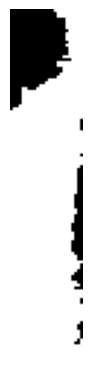

628859_1


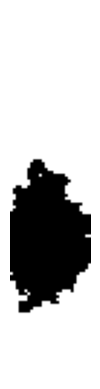

659712_1


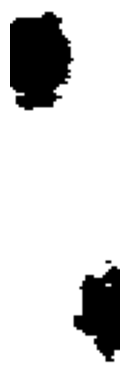

379059_1


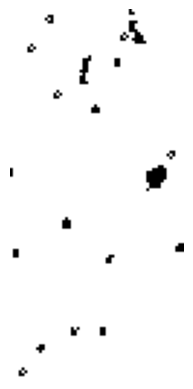

727411_1


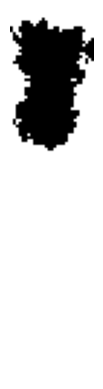

822147_1


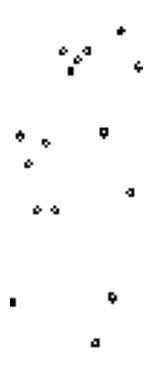

137675_1


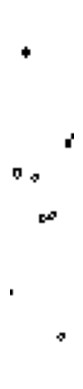

487884_1


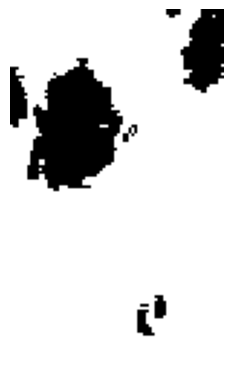

833404_1


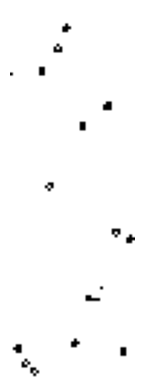

730399_1


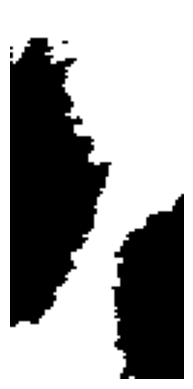

674969_1


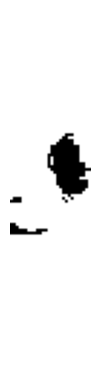

661329_1


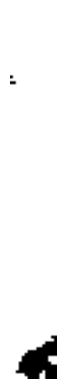

627495_1


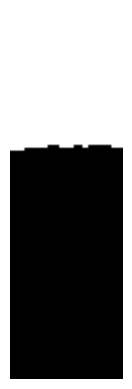

591257_1


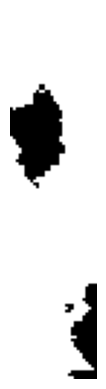

735161_2


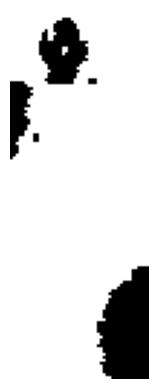

698430_1


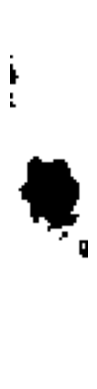

836405_1


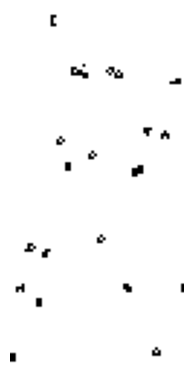

792413_1


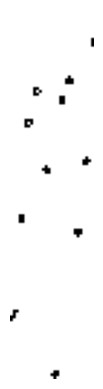

724271_1


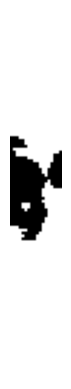

838903_1


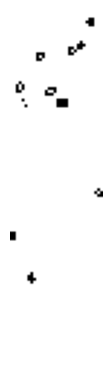

In [127]:
for particle in dic_image_names['WD']:
    print(particle)
    row = image_dict_df['WD'].loc[particle]
    
    circularity = np.divide((row['perimeter']**2),(4*np.pi*row['area']))

    im_s_idx = row['start_index']
    im_e_idx = row['end_index'] ## may want to add more - to look at a bigger slice
    
    one_crystal = f2ds['ImageData'][:,im_s_idx:im_e_idx] # extract 1 crystal
    
    ## this will plot the crystal
    plt.imshow(one_crystal, cmap='gray')
    plt.axis('off')  # Turn off axis labels
    plt.show()


650255_1
650255_1


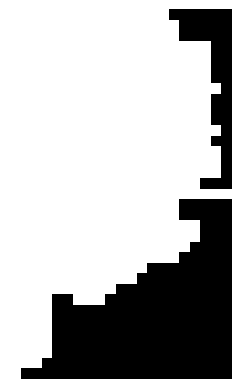

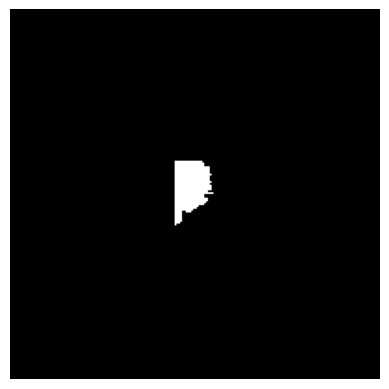

The image contains varying pixel values.


In [169]:

minimum_area = 15 # very quick metric to stop the processing of particles with area < 15 pixels

length_threshold = 100 #300 # mu - need this minimum length of max dimension to extract the particle
pixel_resolution = 10 # mu
desired_image_size = 200 # (assume we want a square image) 200 x 200

wd_names = list(dic_image_names['WD'])
one_crystal = wd_names[0]
print(one_crystal)
row = image_dict_df['WD'].loc[one_crystal]
    
circularity = np.divide((row['perimeter']**2),(4*np.pi*row['area']))

im_s_idx = row['start_index']
im_e_idx = row['end_index'] ## may want to add more - to look at a bigger slice

one_crystal = f2ds['ImageData'][:,im_s_idx:im_e_idx] # extract 1 crystal
#one_crystal = f2ds['ImageData'][:,im_s_idx-40:im_e_idx+100] # extract 1 crystal
'''
## this will plot the crystal
plt.imshow(one_crystal, cmap='gray')
plt.axis('off')  # Turn off axis labels
plt.show()
'''

binary_image = (one_crystal == 0)
labeled_image, num_features = label(binary_image)

props = regionprops(labeled_image)

for particle in props:
    filled_part, spec_region = stats_description(particle,5)
                    ### !!!!!! important part - this is where useful crystals are getting stats + being recorded in the dataframe
                    
    filled_part = filled_part.astype(np.float32) ## convert to float 0 and 1s
     
    if spec_region and spec_region.major_axis_length * pixel_resolution >= length_threshold and spec_region.minor_axis_length > 4 :
        print(f'{im_s_idx}_{particle.label}')
        plt.imshow(filled_part, cmap='gray')
        plt.axis('off')  # Turn off axis labels
        plt.show() 

        filled_part = np.expand_dims(filled_part, axis=-1) ## add extra dimention - this is for adding padding
        imagex = tf.image.resize_with_crop_or_pad(filled_part, desired_image_size, desired_image_size)
        
        plt.imshow(imagex, cmap='gray')
        plt.axis('off') # Turn off axis labels
        plt.show()

        if np.all(imagex == 0):
            print("The image is blank (all pixels are zero).")
        elif np.all(imagex == imagex[0, 0, 0]):
            print("The image is blank (all pixels have the same constant value).")
        else:
            print("The image contains varying pixel values.")

## okay, updated script testing
pull out images with circularity <1.2 

In [44]:
## updated v2 script, pulling out li partilces + saving them
stats_csv = '/gws/nopw/j04/dcmex/users/ezriab/processed_images/2ds/ch_0/220730153000/flight_220730153000.csv'
new_df = pd.read_csv(stats_csv)

# make df of just li < 1.2
all_li = new_df[(new_df['circularity'] <= 1.2)]
name_list = all_li['name'].apply(lambda x: x[:-5]).tolist() ## get list of names of that satisfy the criteria (and remove last 5 values)
name_list

['43045_12']

In [43]:
new_image_path = '/gws/nopw/j04/dcmex/users/ezriab/processed_images/2ds/ch_0/220730153000/'
save_path = '/home/users/esree/image-examples/sample-LI/'

for name in name_list:
    try:
        og_file = f'{new_image_path}{name}.png'
        if os.path.exists(og_file):
            print('y')
            shutil.copy(og_file, save_path)  # Copy the file
            print(f'{name} copied')
        else:
            print(f'{name} doesn\'t exist')
        
    except:
        print(f'{name} doesn\'t exist')

y
37032_4 copied
y
41513_1 copied
y
43045_12 copied
y
91636_7 copied
y
112319_4 copied
y
127632_22 copied
y
127929_8 copied
y
172078_1 copied
y
183006_1 copied
y
183286_16 copied
y
193836_10 copied
y
316163_18 copied
y
320805_1 copied
y
336774_3 copied
y
338343_7 copied
y
361233_5 copied
y
543956_1 copied
y
547849_1 copied
y
562077_1 copied
y
570313_1 copied
y
571480_1 copied
y
571541_1 copied
y
588055_1 copied
y
592007_1 copied
y
604939_1 copied
y
618520_2 copied
y
622023_1 copied
y
631524_1 copied
y
633632_1 copied
y
656119_1 copied
y
658104_1 copied
y
673458_2 copied
y
683680_2 copied
y
688671_1 copied
y
697318_1 copied
y
701133_1 copied
y
709684_1 copied
y
745415_2 copied
y
763674_1 copied
y
764010_1 copied
